# TP Deep Learning

# Régression & Classification

---

# Partie 1 : Boston House Prices

<img src="https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2020/10/boston-foliage-social.jpg" width=60%>

Vous appliquerez vos nouvelles connaissances sur le **MLP (MultiLayer Perceptron)** à un cas d'utilisation de régression classique : la prévision du prix de l'immobilier sur l'ensemble de données **scikit-learn boston**.

1. Chargez le jeu de données et préparez-le.
2. Modélisez un réseau de neurones à cinq couches avec 100 neurones chacun et entraînez-le.
3. Comparez vos résultats avec une régression linéaire classique.



In [2]:
# 1. Chargez le jeu de données et préparez-le.
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_boston(return_X_y=True)

# Split des donnees
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Standardiser les donnees
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Modélisez un réseau de neurones à cinq couches avec 100 neurones
# chacun et entraînez-le.
from sklearn.metrics import *
# Definition de la fonction de création
def model(input_dim):
    # Nous créons un modèle dit séquentiel
    model = tf.keras.models.Sequential()
    
    # Ajouter le premier calque "Dense" de 3 unités, et donner la dimension d'entrée (ici 5)
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation='sigmoid'))
    
    # Ajouter le deuxième calque "Dense" de 3 unités
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

    # Ajouter enfin la couche de sortie avec une unité: le résultat prédit
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    # renvoie le modèle créé
    return model  

# Creation du modèle
my_model = model(input_dim=X.shape[1])
# Compilation :
my_model.compile(optimizer="SGD", loss="mean_squared_error", 
                 metrics=[tf.keras.metrics.mae])

my_model.fit(X_train, y_train, validation_data=(X_test, y_test),
            epochs=75, batch_size=None)

y_pred = my_model.predict(X_test)
print("r2_score =", r2_score(y_test, y_pred))

# 3. Comparez vos résultats avec une régression linéaire classique.
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("r2_score =", r2_score(y_test, y_pred))

import lightgbm as lgb

lgbr = lgb.LGBMRegressor(n_jobs=-1)
lgbr.fit(X_train, y_train)
y_pred = lgbr.predict(X_test)
print("r2_score =", r2_score(y_test, y_pred))

C:\Users\33613\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/75


C:\Users\33613\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 251.9388 - mean_absolute_error: 11.4192 - val_loss: 73.7131 - val_mean_absolute_error: 6.4328
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.5186 - mean_absolute_error: 6.9317 - val_loss: 77.4360 - val_mean_absolute_error: 6.8790
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.5647 - mean_absolute_error: 7.4173 - val_loss: 79.3973 - val_mean_absolute_error: 6.1510
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.3869 - mean_absolute_error: 6.9564 - val_loss: 82.7812 - val_mean_absolute_error: 6.3111
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.3568 - mean_absolute_error: 7.3581 - val_loss: 234.5678 - val_mean_absolute_error: 14.0688
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 115.5015 - mean_absolute_error: 8.4523 - val_loss: 77.0042 - val_mean_absolute_error: 6.8331
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.6414 - mean_absolute_error: 7.3715 - val_lo

---
# Partie 2 : Est-ce qu'il pleut demain ?

<img src="https://cdn.dnaindia.com/sites/default/files/styles/full/public/2019/01/18/779754-rain-room.jpg" width=60%>

Lignes directrices


> Vous pouvez télécharger le jeu de données [ici](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) et le stocker dans votre dossier **`data`**.

Dans cet exercice, nous allons essayer d'utiliser un réseau de neurones sur une tâche de prédiction typique : prédire si demain sera un jour de pluie ou non.

1. Chargez le jeu de données et explorez-le. 
2. La valeur cible est la colonne **`RainTomorrow`**. Modélisez un réseau de neurones à cinq couches avec 100 neurones chacun et entraînez-le.
3. Comparez les performances avec une régression logistique simple.

In [5]:
# 1. Chargez le jeu de données et préparez-le.
import pandas as pd
import numpy as np
df = pd.read_csv("../data/weatherAUS.csv")
df.head()

df.info()

df.Location.unique()

df.isnull().sum() / df.shape[0] *100

# On drop les colonnes avec trop de valeurs manquantes
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Valeurs nulles dans la cible à prédire (RainTomorrow)
df.dropna(subset=["RainTomorrow", "RainToday"], inplace=True)

# Pour chaque colonne 
for c in df.columns :
    # Si la colonne est categorielle ?
    if df[c].dtype.name == 'object':
        if df[c].isnull().sum() > 0:
            n = df[c].nunique()
            print(c, "has", n, "values")
            if n > 5:
                print("Dropping", c)
                df.drop(c, axis=1, inplace=True)
            else:
                print("Filling missing values")
                df[c].fillna(df[c].mode(), inplace=True)

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df.Date.dt.month

cities = df[(df.groupby(["Month", "Location"])["Pressure9am"].transform("mean")).isnull()].Location.unique()
df[df.Location.isin(cities)]

# Remplissage des valeurs nulles dans les colonnes numeriques
for nm in df.columns:
    # Si la colonne est bien numerique
    if type(df[nm][0])==np.float64:
        print("Filling missing values in",nm)
        df["tmp"]=df.groupby(["Month", "Location"])[nm].transform("mean")
        df.loc[df[nm].isna(),nm] = df.loc[df[nm].isna(),"tmp"]
        # Si aucune valeur par ville on prend la moyenne du pays :
        if df[nm].isnull().sum()>0:
            df["tmp"]=df.groupby(["Month"])[nm].transform("mean")
            df.loc[df[nm].isna(),nm] = df.loc[df[nm].isna(),"tmp"]
        df=df.drop("tmp",axis=1)
df.drop("Month", axis=1, inplace=True)
df.isna().sum()

# On recode "RainToday" et "RainTomorrow" en numerique
for c in ["RainToday", "RainTomorrow"]:
    df[c].replace("Yes", 1, inplace=True)
    df[c].replace("No", 0, inplace=True)
df.info()

# Gestion de la derniere variable categorielle : "Location"
myset = set( df.Location)
print(myset)
dic_location={}
j=0
for i in myset:
    dic_location[i]=j
    j+=1
print(dic_location)
df['Location']=df.Location.map(dic_location)

# Split des donnees
X, y = df.drop(["RainTomorrow", "Date"], axis=1), df["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Modélisez un réseau de neurones à cinq couches avec 100 neurones chacun et entraînez-le.
import tensorflow as tf
# Definition de la fonction de création
def model(input_dim):
    # Nous créons un modèle dit séquentiel
    model = tf.keras.models.Sequential()
    
    # Ajouter le premier calque "Dense" de 100 unités, 
#     et donner la dimension d'entrée (ici 5)
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, 
                                    activation='relu'))
    # Ajouter le deuxième calque "Dense" de 100 unités
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))

    # Ajouter enfin la couche de sortie avec une unité: le résultat prédit
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # renvoie le modèle créé
    return model  

# Creation du modèle
my_model = model(input_dim=X.shape[1])
# Compilation :
my_model.compile(optimizer="SGD", loss="binary_crossentropy", 
                 metrics=["accuracy", "Recall"])

my_model.fit(X_train, y_train, validation_data=(X_test, y_test),
            epochs=75, batch_size=128)

y_pred = my_model.predict(X_test)

# Test du modele de deep learning
y_pred = my_model.predict(X_test)>0.5
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred))

# 3. Comparez vos résultats avec une régression logistique classique.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

C:\Users\33613\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.0937 - accuracy: 0.7353 - loss: 0.5709 - val_Recall: 0.3439 - val_accuracy: 0.8223 - val_loss: 0.4054
Epoch 2/75
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4006 - accuracy: 0.8286 - loss: 0.3917 - val_Recall: 0.4811 - val_accuracy: 0.8419 - val_loss: 0.3701
Epoch 3/75
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4872 - accuracy: 0.8438 - loss: 0.3683 - val_Recall: 0.4802 - val_accuracy: 0.8453 - val_loss: 0.3630
Epoch 4/75
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4904 - accuracy: 0.8433 - loss: 0.3643 - val_Recall: 0.4656 - val_accuracy: 0.8468 - val_loss: 0.3605
Epoch 5/75
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4908 - accuracy: 0.8455 - loss: 0.3614 - val_Recall: 0.5151 - val_accuracy: 0.8486 - val_loss: 0.3574
Epoch 6/75
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4964 - accuracy: 0.8482 - loss: 0.3544 - val_Recall: 0.5036 - val_accuracy: 0.8489 - val_loss: 0.3556
Epoch 7/75
770/

,0,1
0,31171,1744
1,4914,4408


---
# Partie 3 : MLP à la mode de chez nous

<img src="https://www.linfodurable.fr/sites/linfodurable/files/styles/landscape_w800/public/2019-05/v%C3%AAtements.jpg?h=983a09bf&itok=28u6sVQQ" width=60%>

Dans cet exercice, nous allons essayer d'utiliser un réseau de neurones sur une tâche de classification un peu moins simple : classer des images de vêtements en 10 classes.

Nous allons d'abord télécharger les données :

In [6]:
from tensorflow.keras.datasets import fashion_mnist
# Recuperation des données sous forme de tableaux numpy
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Cet ensemble de données contient 10 classes :
    
    
- **0** : T-shirt/top - T-shirt / haut
- **1** : Trouser - pantalon
- **2** : Pullover - Pull
- **3** : Dress - robe
- **4** : Coat - manteau
- **5** : Sandal - sandale
- **6** : Shirt - chemise
- **7** : Sneaker - baskets
- **8** : Bag - sac
- **9** : Ankle boot - bottine

Commencez maintenant par explorer les données. Essayez d'afficher certaines images avec le label associé. 

> Astuce : regarder la fonction **`imshow`** de matplotlib.

In [7]:
# explorer les données. Essayez d'afficher certaines images avec le label associé
X_train.shape

(60000, 28, 28)

In [8]:
# Que donne une image en pixels ? Un tableau en 2D car nous sommes en niveau de gris
# 0 : pixel blanc, 255: pixel noir
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


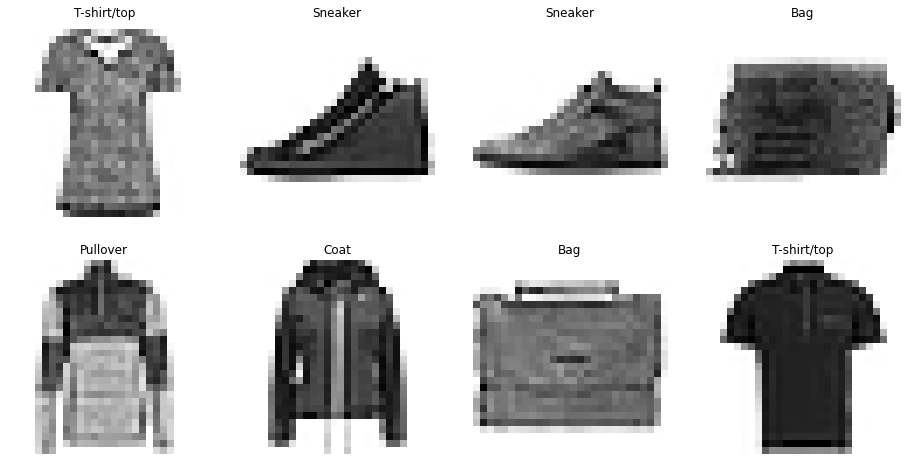

In [9]:
import matplotlib.pyplot as plt
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(16, 8))
for i in range(8):
    index = np.random.randint(0, X_train.shape[0], 1)[0]
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_train[index], cmap='Greys')
    plt.title(classes[y_train[index]])
    plt.axis("off")
plt.show()

Avant d'aller plus loin: quelles méthodes pourriez-vous utiliser pour effectuer une telle tâche de classification ?

> C'est un problème multi-classe, nous utiliserons donc un modèle de Deep Learning avec un fonction d'activation softmax sur la couche de sortie qui sera composée de 10 unités car nous avons 10 classes.

---
La première méthode que vous allez essayer consiste à utiliser des réseaux de neurones. 

La première étape est la préparation des données : remise à l'échelle des données, préparation des labels.

Astuce : vous pouvez utiliser la fonction Keras **`to_categorical`**

In [10]:
from tensorflow.keras.utils import to_categorical
# Mise à l'échelle des données, 
# on remet tout sur l'intervalle 0->1 en divisant par la valeur max
X_train = X_train/255
X_test = X_test/255
# Transformation des labels reponse en categories
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Applatir les données pour repasser de représentations 3D à 2D
X_train=X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test=X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

**Étape suivante** :  création de modèles avec Keras. 

Construisez votre architecture de réseau neuronal. 

Dans un premier temps, essayez une architecture légère : pas plus de 2 couches cachées, avec environ 10 unités par couche. 

Mettez ce modèle dans une fonction afin de pouvoir le réutiliser plus tard.

In [11]:
def model(input_dim):
    # Nous créons un modèle dit séquentiel
    model = tf.keras.models.Sequential()
    
    # Ajouter le premier calque "Dense" de 10 unités, 
#     et donner la dimension d'entrée (ici 28*28)
    model.add(tf.keras.layers.Dense(128, input_dim=input_dim, 
                                    activation='relu'))
    # Ajouter le deuxième calque "Dense" de 10 unités
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    # Ajouter enfin la couche de sortie avec une unité: le résultat prédit
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # renvoie le modèle créé
    return model

Maintenant, compilez et entraînez votre modèle sur vos données d'entraînement. 

Puisqu'il s'agit d'une classification multiclasse, la perte n'est plus **`binary_crossentropy`**, mais **`categorical_crossentropy`**.



In [29]:
y_test= to_categorical(y_test)

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Creation du modèle
my_model = model(input_dim=X_train.shape[1])
# Compilation :
my_model.compile(optimizer='adam',
                 loss="categorical_crossentropy", 
                 metrics=["accuracy",  tf.keras.metrics.Recall()])

my_model.fit(X_train, y_train, validation_data=(X_test, y_test),
            epochs=30, batch_size=128)